In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

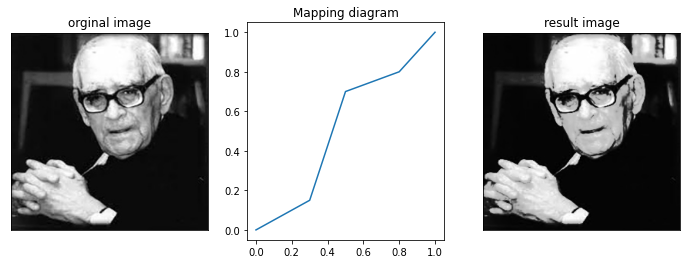

In [35]:
a = [0, 0.3, 0.5, 0.8, 1]
b = [0, 0.15, 0.7, 0.8, 1]

img = cv2.imread("professor.jpg", cv2.IMREAD_GRAYSCALE)
norm_img = cv2.normalize(src=img, dst=None, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

N = len(a)
out = np.zeros(norm_img.shape)
pix=[]

for i in range(N-1):
    indices = np.logical_and(a[i] <= norm_img , norm_img< a[i+1])
    out[indices]= (norm_img[indices]-a[i]) * (b[i+1]-b[i])/(a[i+1]-a[i]) + b[i]

out[norm_img==a[N-1]]=b[N-1]
# indices=np.where(norm_img==a[N-1])
# out[indices]=b[N-1]


fig, axes= plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(img,  cmap='gray')
axes[0].set_title('orginal image')
axes[0].set_xticks([])
axes[0].set_yticks([])


axes[1].plot( a, b)
axes[1].set_title('Mapping diagram')


axes[2].imshow(out, cmap='gray',  vmin=0.0, vmax=1.0)
axes[2].set_title('result image')
axes[2].set_xticks([])
axes[2].set_yticks([])


plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
